#Self Organizing Maps (SOM)

Self-Organizing Maps (SOM), also known as Kohonen Maps, are a type of artificial neural network used for unsupervised learning and dimensionality reduction. They are commonly used for clustering and visualizing high-dimensional data. Here are the key formulas for SOM

#Initialization of Neurons:

Neuron weights (W) are initialized with small random values, typically between 0 and 1.

#Distance Calculation:

Euclidean distance between a neuron's weight vector (W) and input vector (X) is calculated as follows:

In [1]:
d(W, X) = sqrt(sum((W_i - X_i)^2))
#Where W_i is the weight and X_i is the input component.

SyntaxError: ignored

#Best Matching Unit (BMU):

The neuron with the smallest distance to the input vector is selected as the Best Matching Unit (BMU).

#Learning Rate:

The learning rate (alpha) decreases over time to gradually reduce the impact of the training on neuron weights.

#Neighborhood Function:

A neighborhood function defines how the influence of BMU spreads to neighboring neurons. Common choices include the Gaussian function.

#Update Weights:

Neuron weights are updated as follows:

In [ ]:
W_new = W_old + alpha * neighborhood_func * (X - W_old)
#Where W_new is the updated weight, W_old is the old weight, alpha is the learning rate, neighborhood_func is the neighborhood function, and X is the input vector.

#Experimentation with different SOM related functions
SOM implementation from the minisom library to experiment with SOM-related functions and visualize a Self-Organizing Map (SOM) for 4x4 pixel blocks from 256x256 bridge images:

In [2]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=23476d9805d19dbc60cf7e9a82c5c1f007b48a473dd3f15969133fd029a2e20c
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [3]:
import minisom
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define the dimensions of the SOM grid
grid_size = (8, 8)

# Initialize a SOM with the specified grid size and input size
som = minisom.MiniSom(grid_size[0], grid_size[1], 16, sigma=1.0, learning_rate=0.5)

In [5]:
# Load image data from a text file
image_data = []

# Assuming the text file contains image data with space-separated values
with open("bridge.txt", "r") as file:
    for line in file:
        values = line.strip().split()
        image_data.append(list(map(float, values)))

In [6]:
# Convert the list of image data to a NumPy array
image_data = np.array(image_data)

In [7]:
# Normalize the data to values between 0 and 1
image_data = image_data / 255.0

In [8]:
# Train the SOM on the image data
som.train(image_data, 1000)

In [9]:
# Get the weights for each neuron in the SOM grid
neuron_weights = som.get_weights()

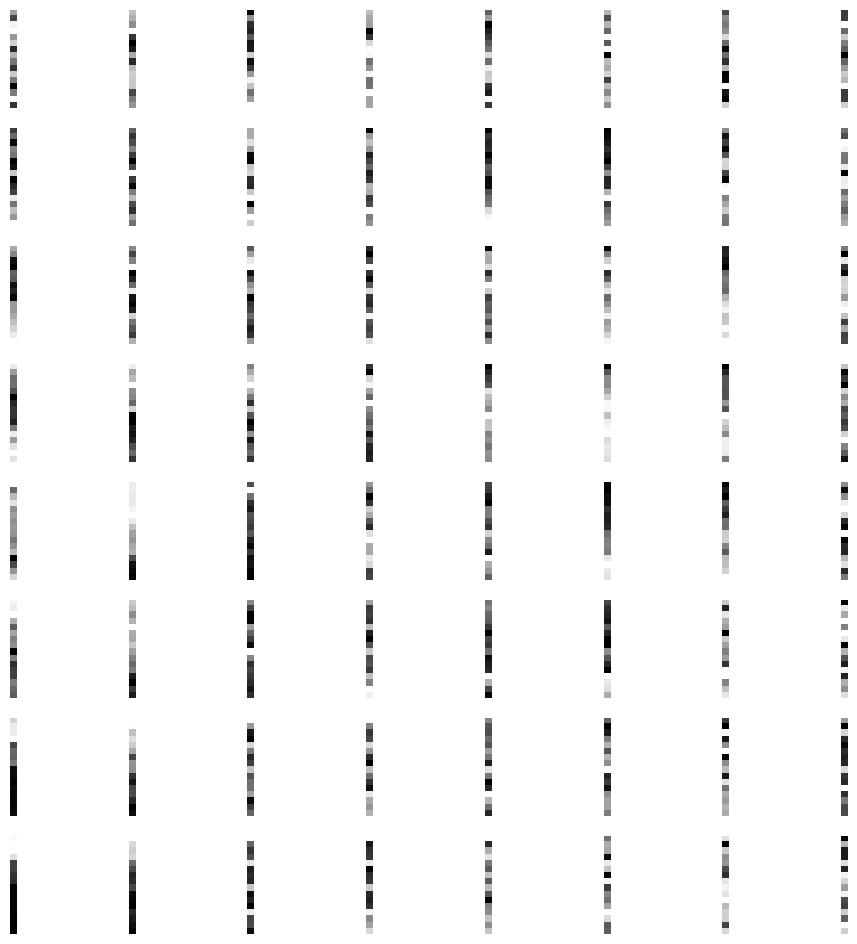

In [10]:
# Create a visualization of the neuron weights
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 12))
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        ax = axes[i, j]
        ax.imshow(neuron_weights[i, j].reshape(16, 1), cmap='gray')
        ax.axis('off')

plt.show()